Imports para el proyecto

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

Lectura de archivos CSV

In [ ]:
# Leer los archivos CSV
data_path = '/content/drive/MyDrive/2020-Gasto-COVID-19.csv'
dic_path = '/content/drive/MyDrive/Gasto_COVID_19_Diccionario.csv'

# Leer el conjunto de datos principal
data = pd.read_csv(data_path, encoding='latin1')

# Leer el diccionario de datos
diccionario = pd.read_csv(dic_path, encoding='latin1')

<ipython-input-2-c73a1e1ba819>:6: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path, encoding='latin1')


Inspeccionamiento de datos y diccionario de datos

In [ ]:
# Mostrar las primeras filas de los datos
print("Datos principales:")
print(data.head())

print("\nDiccionario de datos:")
print(diccionario.head())

Datos principales:
   ANO_EJE  MES_EJE NIVEL_GOBIERNO NIVEL_GOBIERNO_NOMBRE  SECTOR  \
0     2020        7              E     GOBIERNO NACIONAL      13   
1     2020        8              E     GOBIERNO NACIONAL      13   
2     2020        8              E     GOBIERNO NACIONAL      13   
3     2020        0              E     GOBIERNO NACIONAL      13   
4     2020        0              E     GOBIERNO NACIONAL      13   

  SECTOR_NOMBRE  PLIEGO                      PLIEGO_NOMBRE  SEC_EJEC  \
0   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   
1   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   
2   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   
3   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   
4   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   

   EJECUTORA  ...              ESPECIFICA_NOMBRE  ESPECIFICA_DET  \
0          1  ...  A OTRAS UNIDADES DEL GOBIERNO               1   
1  

Filtrado de datos

In [ ]:
# Filtrar columnas relevantes
data_filtered = data[['MONTO_CERTIFICADO', 'MONTO_DEVENGADO']]

# Convertir a numérico y manejar valores faltantes
data_filtered['MONTO_CERTIFICADO'] = pd.to_numeric(data_filtered['MONTO_CERTIFICADO'], errors='coerce')
data_filtered['MONTO_DEVENGADO'] = pd.to_numeric(data_filtered['MONTO_DEVENGADO'], errors='coerce')

# Eliminar filas con valores faltantes
data_filtered.dropna(inplace=True)

print("Datos filtrados y limpios:")
print(data_filtered.describe())

Datos filtrados y limpios:
       MONTO_CERTIFICADO  MONTO_DEVENGADO
count       2.030750e+05     2.030750e+05
mean        1.102352e+05     1.089204e+05
std         4.104022e+06     3.576669e+06
min        -2.466100e+08    -3.899862e+06
25%         0.000000e+00     0.000000e+00
50%         0.000000e+00     0.000000e+00
75%         1.302100e+03     1.850000e+03
max         9.310798e+08     9.310798e+08


<ipython-input-4-9327e8289024>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MONTO_CERTIFICADO'] = pd.to_numeric(data_filtered['MONTO_CERTIFICADO'], errors='coerce')
<ipython-input-4-9327e8289024>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MONTO_DEVENGADO'] = pd.to_numeric(data_filtered['MONTO_DEVENGADO'], errors='coerce')
<ipython-input-4-9327e8289024>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

Aplicar K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

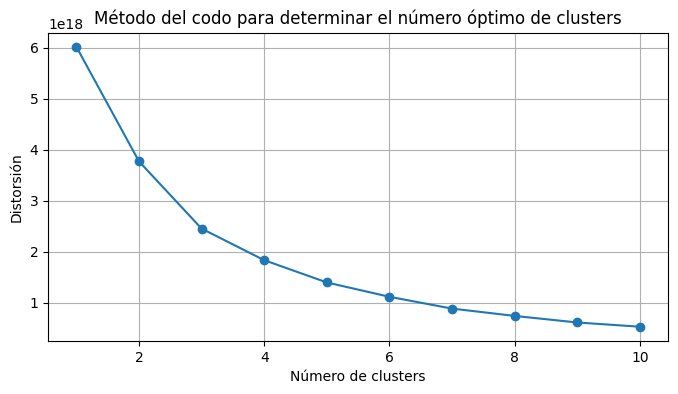

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Datos con clusters asignados:
   MONTO_CERTIFICADO  MONTO_DEVENGADO  Cluster
0             6000.0              0.0        0
1                0.0              0.0        0
2                0.0           6000.0        0
3                0.0              0.0        0
4                0.0              0.0        0


<ipython-input-5-e0ba95977e0b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Cluster'] = kmeans.fit_predict(data_filtered)


In [ ]:
# Aplicar K-Means
# Determinar el número óptimo de clusters usando el método del codo
def plot_elbow_method(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Distorsión')
    plt.title('Método del codo para determinar el número óptimo de clusters')
    plt.grid(True)
    plt.show()

plot_elbow_method(data_filtered)

# Elegir el número óptimo de clusters (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=0)
data_filtered['Cluster'] = kmeans.fit_predict(data_filtered)

print("Datos con clusters asignados:")
print(data_filtered.head())


Visualizacion de k-means y analisis

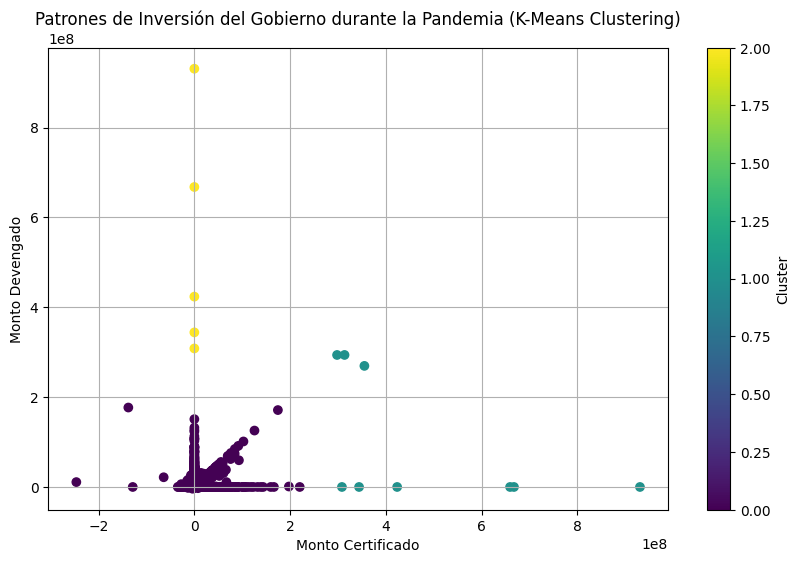

In [ ]:
# Paso 4: Visualización y análisis
# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['MONTO_CERTIFICADO'], data_filtered['MONTO_DEVENGADO'], c=data_filtered['Cluster'], cmap='viridis')
plt.xlabel('Monto Certificado')
plt.ylabel('Monto Devengado')
plt.title('Patrones de Inversión del Gobierno durante la Pandemia (K-Means Clustering)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Analisis descriptivo por cluster

In [ ]:
# Análisis descriptivo por cluster
cluster_analysis = data_filtered.groupby('Cluster').mean()
print("Análisis descriptivo por cluster:")
print(cluster_analysis)

Análisis descriptivo por cluster:
         MONTO_CERTIFICADO  MONTO_DEVENGADO
Cluster                                    
0             8.905718e+04     9.153217e+04
1             4.779979e+08     9.525528e+07
2             0.000000e+00     5.350189e+08


Evaluacion de modelo

In [ ]:
# Paso 3: Evaluación del modelo
# Métricas de evaluación sin etiquetas verdaderas
silhouette_avg = silhouette_score(data_filtered[['MONTO_CERTIFICADO', 'MONTO_DEVENGADO']], data_filtered['Cluster'])
print(f"Índice de Silueta: {silhouette_avg:.3f}")

# Para métricas que requieren etiquetas verdaderas, simulamos etiquetas verdaderas
# Esto es solo para demostración; en un caso real, necesitarías etiquetas reales
true_labels = np.random.randint(0, 3, len(data_filtered))

# Calcular métricas que requieren etiquetas verdaderas
homogeneity = homogeneity_score(true_labels, data_filtered['Cluster'])
completeness = completeness_score(true_labels, data_filtered['Cluster'])
v_measure = v_measure_score(true_labels, data_filtered['Cluster'])

print(f"Homogeneidad: {homogeneity:.3f}")
print(f"Completeness: {completeness:.3f}")
print(f"V-Measure: {v_measure:.3f}")

# Calcular inercia
inertia = kmeans.inertia_
print(f"Inercia (Suma de Cuadrados Dentro del Cluster): {inertia:.3f}")

Índice de Silueta: 0.999
Homogeneidad: 0.000
Completeness: 0.023
V-Measure: 0.000
Inercia (Suma de Cuadrados Dentro del Cluster): 2450548718485798912.000
